# Assignment 4: Supervised Learning, Decision Trees, Random Forests, and SVM Models

**Objective:** In this assignment we will develop predictive models - decision trees, random forest, and SVM models from sklearn library. We will also experiment with grid search and random search.


Please do not share this material on any platform or by any other means.

Important Notes:

    Make changes to the cells that have # YOUR CODE HERE or # YOUR COMMENT HERE.Do not write your answer in anywhere else other than where it says YOUR CODE HERE (or YOUR COMMENT HERE).

    Your code must run without any errors start to end. Please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all) before submitting your work.

    Purpose of the assignment is to assess your knowledge and command of the data mining algorithms, python programming language, and your ability to resolve common errors. Grading is based on the code and your interpretation/comments you are submitting, not the formatting of the results.

    Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question.

Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions.

In this assignment you'll develop an understanding of decision trees, random forest using a mock-dataset called moons dataset, then build a SVM model to predict the California dataset. 

## PART 1: DECISION TREES

### Q1: Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
Random state = 42.

In [ ]:
#YOUR CODE HERE


If you are successful in creating the dataset, it may look like this:

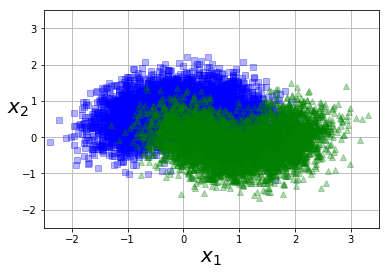

In [42]:
import matplotlib.pyplot as plt
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha=0.3)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha=0.3)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-2.5, 3.5, -2.5, 3.5])
plt.show();

### Q2:  Split the data into a training set and a test set using train_test_split().
Random state = 42.

In [ ]:
#YOUR CODE HERE


### Q3: Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. 
Test various values for max_leaf_nodes.

In [ ]:
#YOUR CODE HERE


### Q4: Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. 
You may get roughly 85% to 87% accuracy.

In [ ]:
#YOUR CODE HERE


In [1]:
#YOUR COMMENTS HERE
# interpret the results



## Creating many decision trees

Let's continue to use the same dataset as before and generate 1,000 subsets of the training set, each containing 100 instances selected randomly. We will use Scikit-Learn's ```ShuffleSplit``` class for this:

In [7]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

Let's use the best estimater values we found in question 3, and 
(1) generate the 1000 trees, and call it our "forest"
(2) fit and calculate the accuracy scores for each decision tree

In [9]:
from sklearn.base import clone
import numpy as np
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

Since each decision tree is trained on a smaller dataset (100 examples) than the one in Q4 (10000 examples), the accuracy score is lower.  

### Majority Vote

For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you **majority-vote predictions** over the test set.

In [10]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [11]:
from scipy.stats import mode
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [12]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872

## PART 2: RANDOM FOREST

### Q5: Build a random forest model with 1000 trees, and check the accuracy score.
Random state = 42. 

In [ ]:
#YOUR CODE HERE


### Q6: Use GridSearchCV to find a Random Forest model, is it better or worse than 1000-Decision Trees majority vote (compare to Q5 accuracy)? 
Random state = 42. 

In your grid search, use max_leaf_nodes_options= list(range(2, 100)) and min_samples_split_options = [2, 3, 4]

In [ ]:
#YOUR CODE HERE


### Q7: If in Q6 you found a better accuracy score then Q5? explain how. If not continue to fine tune your model to find a higher accuracy.
Random state = 42. 
Hint: 87.7 is one possible accuracy. 

In [ ]:
#YOUR CODE HERE


## PART 3: ENSEMBLE MODEL


### Q8: Use the final Decision tree and Random Forest models that you created above, combine them with one/two more models of your choice and create an ensemble model

You can create an ensemble model by combining the outputs from your models i.e taking the majority of the output predictions as your final prediction. For eg. if for a specific classification problem of "Yes" or "No", you have 3 models and for a specific row, 2 of the models predicted a "Yes" then your ensemble model preiction will be a "Yes".

In [1]:
#YOUR CODE HERE


### Q9. Summarize your results. Which of the models yielded the best predictions overall, and which models had the best precision, recall and AUC-ROC? Interpret the output.

In [2]:
#YOUR CODE HERE

## PART 4: Predicting California Hausing Prices using SVM

HomeVal AI is a pioneering project initiated by a collaboration of urban planners, data scientists, and real estate analysts. The goal is to develop a robust model to predict housing prices in various regions of California. This initiative is crucial for understanding housing market trends, assisting in policy-making, and guiding potential buyers and real estate developers.

You are working as a data scientist at HomeVal AI coorporation. You are tasked with developing a regression model to predict housing prices, and to start with you have the California Housing price data.

Best way to start any project is by understanding the data, and building a simple model to get your project off the ground. You will start by developing an SVM model!

Regression is the task of predicting a continious-valued class labels (dependent variable) based on the values of other attributes (independent or predictor variables).

Train an SVM model on the California housing dataset. Using a random search, identify the best performing hyperparameters. What is your best model?

More info on data:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


### Q10: Import the California housing data from sklearn.datasets, then split the data into train and test. 
Random state = 42, test size 20%.

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print (housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
#YOUR CODE HERE
X = 
y = 

### Q11: Build a linear SVM model and review the model's performance on the test set

In [ ]:
#YOUR CODE HERE


### Q12: Build a SVM model with kernel='rbf', using RandomizedSearchCV and review the model's performance on the test set. What is the best model you found? What are the parameters?

Use the gamma_options and C_options in your randomized search.

In [ ]:
from scipy.stats import reciprocal, uniform
gamma_options= reciprocal(0.001, 0.1)
C_options= uniform(1, 10)

In [ ]:
#YOUR CODE HERE


### Q13: Compare the linear model and the kernel model, which one should we use for prediction and WHY?

In [ ]:
#YOUR COMMENT HERE


**ASSIGNMENT 4 COMPLETE! WELL DONE!**